In [167]:
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
import pandas as pd
import numpy as np

In [182]:
test = pd.read_csv("./titanic/test.csv")
train = pd.read_csv("./titanic/train.csv")
draw_df = train.append(test)#畫圖用

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 基本欄位的型態、關係
欄位|中文意思|變數型態
:-:|:-:|:-:
PassengerId|編號|離散變數
Pclass|船艙等級|離散變數
Name|名字|離散變數
Sex|性別|離散變數
Age|年齡|<font color=#ff0000>連續變數</font>
SibSp|同為兄弟姐妹或配偶的數目|離散變數
Parch|同為家族的父母及小孩的數目|離散變數
Ticket|船票編號|離散變數
Fare|價格|<font color=#ff0000>連續變數</font>
Cabin|船艙號碼|離散變數
Embarked|登船的口岸|離散變數

In [184]:
#取出目標變數的部分
y_train= train["Survived"]
train.drop(columns="Survived",inplace=True)

In [185]:
#將train,test 兩個df給結合
master_df = pd.concat([train,test]).reset_index(drop=True)
work_df = master_df.copy()
work_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [186]:
#確認空值部分
work_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 畫圖:性別（離散）跟存活（離散）的關性

'從整體來看的話可以看到女生的存活率是高於男性，死亡率也是低於男性的'

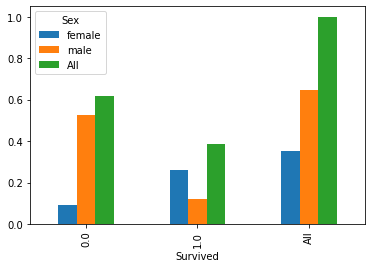

In [198]:
pd.crosstab(draw_df["Survived"],draw_df["Sex"],normalize=True,margins=True).plot.bar()
"""從整體來看的話可以看到女生的存活率是高於男性，死亡率也是低於男性的"""

### 畫圖:艙等（離散）跟存活（離散）的關性

In [208]:
draw_df[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


'上表Pcalss1的在存活人數上的多的約62%，\n此圖可以看到Pcalss2\x03的死亡人數都大於存活人數尤其是Pclass3，\n可以看出Pclass因該是有等級上的呈現'

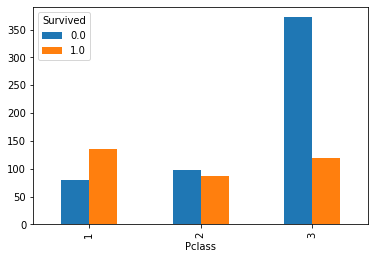

In [210]:
pd.crosstab(draw_df["Pclass"],draw_df["Survived"]).plot.bar()
"""上表Pcalss1的在存活人數上的多的約62%，
此圖可以看到Pcalss2\3的死亡人數都大於存活人數尤其是Pclass3，
可以看出Pclass因該是有等級上的呈現"""

### 畫圖:船票（連續）跟存活（離散）的關性

'可以看到Pclass越高的錢付的越多，並且活的人所付的錢都大於死亡的人所附的錢'

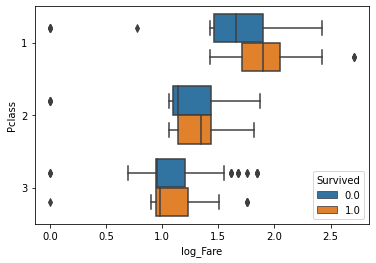

In [219]:
#將Fare做log 解決偏態
draw_df["log_Fare"] = (draw_df["Fare"]+1).map(lambda x : np.log10(x) if x >0 else 0)
sns.boxplot(data=draw_df ,x="log_Fare",y="Pclass" ,hue="Survived" ,orient="h")
"""可以看到Pclass越高的錢付的越多，並且活的人所付的錢都大於死亡的人所附的錢"""

### 畫圖:年齡（連續）跟存活（離散）的關性

In [243]:
draw_df["log_Age"] =(draw_df["Age"]+1).map(lambda x : np.log10(x) if x >0 else 0)
sns.boxplot(data=draw_df ,x="Age", y="Survived" ,orient="h")

### 畫圖:Cabin 船艙號碼（連續）跟存活（離散）的關性

In [255]:
draw_df["Cabin"]=work_df["Cabin"]
draw_df[["Cabin","Survived"]].groupby("Cabin").mean()

,Survived
Cabin,
A,0.375000
B,0.387255
C,0.393574
D,0.354839
E,0.411765
F,0.365079
G,0.333333
T,0.500000


### 畫圖:Embarked 登船口岸（連續）跟存活（離散）的關性

In [257]:
draw_df[["Embarked","Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [250]:
#性別轉換
work_df["Sex"]=work_df["Sex"].replace({"female":1,"male":0})
#把親人的總數給加總
work_df["Family"]=work_df["SibSp"]+work_df["Parch"]
#Cabin 缺值填補、縮小類別
work_df["Cabin"]=work_df.Cabin.fillna(method="bfill").fillna(work_df.Cabin.dropna().map(lambda x :str(x)[0]).value_counts().index[0]).map(lambda x :str(x)[0])
#Fare價格填補、用中位數當補值
work_df["Fare"]=work_df["Fare"].fillna(np.nanmedian(work_df["Fare"]))
#Embarked 填補缺失，用最多的去填
work_df["Embarked"]=work_df["Embarked"].fillna(work_df.Embarked.value_counts().index[0])

In [254]:
#做Cabin、Embarked的OneHotEncoder
ohe_df=pd.get_dummies(work_df[["Cabin","Embarked"]])


In [85]:
#去除不需要的欄位
work_df_2 = pd.concat([work_df[["Pclass","Sex","Age","Family","Fare"]],ohe_df],axis=1)
work_df_2

,Pclass,Sex,Age,Family,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,7.2500,0,0,1,0,0,0,0,0,0,0,1
1,1,1,38.0,1,71.2833,0,0,1,0,0,0,0,0,1,0,0
2,3,1,26.0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,53.1000,0,0,1,0,0,0,0,0,0,0,1
4,3,0,35.0,0,8.0500,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,NaN,0,8.0500,0,0,1,0,0,0,0,0,0,0,1
1305,1,1,39.0,0,108.9000,0,0,1,0,0,0,0,0,1,0,0
1306,3,0,38.5,0,7.2500,0,0,1,0,0,0,0,0,0,0,1
1307,3,0,NaN,0,8.0500,0,0,1,0,0,0,0,0,0,0,1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

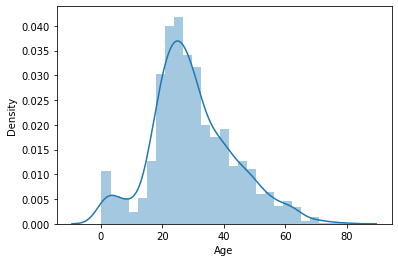

In [101]:
#Age補值，使用KNN
#1.畫圖看分佈
sns.distplot(work_df_2["Age"],kde=True)



In [97]:
#2.補值
from sklearn.impute import KNNImputer
knnI= KNNImputer(weights="distance")
age_fill=pd.DataFrame(knnI.fit_transform(work_df_2))
work_df_2["Age"] = age_fill[2]

In [99]:
work_df_2.isnull().sum()

Pclass        0
Sex           0
Age           0
Family        0
Fare          0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

無多大的變化


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

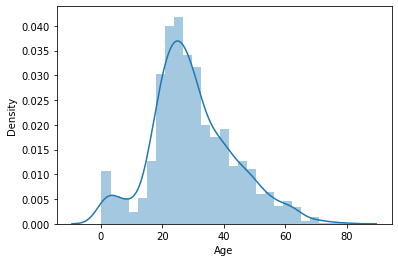

In [103]:
print("無多大的變化")
sns.distplot(work_df_2["Age"],kde=True)

### 模型


In [124]:
#1.import 需要的模型
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.

In [125]:
#2.分切訓練、預測集
x_train = work_df_2.iloc[:train.shape[0],:]
x_test = work_df_2.iloc[train.shape[0]:,:]

In [258]:
x_train.iloc[:,:5]

,Pclass,Sex,Age,Family,Fare
0,3,0,22.000000,1,7.2500
1,1,1,38.000000,1,71.2833
2,3,1,26.000000,0,7.9250
3,1,1,35.000000,1,53.1000
4,3,0,35.000000,0,8.0500
...,...,...,...,...,...
886,2,0,27.000000,0,13.0000
887,1,1,19.000000,0,30.0000
888,3,1,22.613724,3,23.4500
889,1,0,26.000000,0,30.0000


In [259]:
#3.建例模型
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(random_state=1))

from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=pipe_lr , X= x_train.iloc[:,:5] ,y=y_train, cv=10 , n_jobs=1)
print("CV score :%s" %score)
print("Test Accury : %.3f +/- %.3f " % (np.mean(score),np.std(score)))

CV score :[0.78888889 0.78651685 0.75280899 0.84269663 0.82022472 0.78651685
 0.80898876 0.79775281 0.84269663 0.79775281]
Test Accury : 0.802 +/- 0.026 


In [260]:
pipe_lr.fit(x_train.iloc[:,:5],y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [261]:
y_predict=pipe_lr.predict(x_test.iloc[:,:5])

In [262]:
y_true=pd.read_csv("./titanic/gender_submission.csv")
from sklearn.metrics import accuracy_score

accuracy_score(y_true["Survived"],y_predict)

In [268]:
end_df = y_true.copy()
end_df["Survived"] =y_predict
end_df.to_csv("Test2.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
